In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
import random

import networkx as nx
import numpy as np

from SpreadPy import AnalyticalUtils
from SpreadPy.Models.models import *

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def find_layer_names (layer_files):
    name_layers = []
    for file in layer_files:
        name_layer = file.split("\\")[-1]
        name_layers.append(name_layer)
    return [name_layer.split('.')[0] for name_layer in name_layers]


def build_graph (layer_files, name_layers):
    g = nx.Graph()
    for i, file in enumerate(layer_files):
        with open(file) as f:
            for l in f:
                l = l.rsplit()
                g.add_edge(l[0], l[1])

                if 'layer' not in g.edges[l[0], l[1]].keys():
                    g.edges[l[0], l[1]]['layer'] = [name_layers[i]]
                else:
                    if name_layers[i] not in g.edges[l[0], l[1]]['layer']:
                        g.edges[l[0], l[1]]['layer'].append(name_layers[i])
    return g

In [4]:
layer_files = glob('toy_data/mental_lexicon_2/*.txt')
layer_names = find_layer_names(layer_files)

In [5]:
layer_names

['FreeAssociations', 'PhonSimilarities']

In [6]:
g_multiplex = build_graph(layer_files, layer_names)

g_multiplex.remove_edges_from(nx.selfloop_edges(g_multiplex))
'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 17039, 'E', 72588)

In [7]:
utils = AnalyticalUtils(g_multiplex)

In [8]:
lvc_nodes = utils.lvc(layer_names)
len(lvc_nodes)

4118

In [9]:
to_rem = list(set(g_multiplex.nodes())^set(lvc_nodes))
g_multiplex.remove_nodes_from(to_rem)

In [10]:
'N', g_multiplex.number_of_nodes(), 'E', g_multiplex.number_of_edges()

('N', 4118, 'E', 26229)

In [11]:
model = MultiplexSpreading(g_multiplex,
                      retention=0.7, decay=0, suppress=0,
                      intra_layer_prob = 1,
                      inter_layer_prob = 0.01,
                      weighted=False,
                     )

################### INITIAL SETTING ##############
initial_active_node = ['be']
initial_layer = ['FreeAssociations']

initial_status = {layer:
                  {node: 100 if node in initial_active_node and layer in initial_layer else 0 \
                   for node in g_multiplex.nodes} \
                 for layer in model.layers}

model.status = initial_status
time = 10
#################################################

results = model.iteration_bunch(time)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.68s/it]


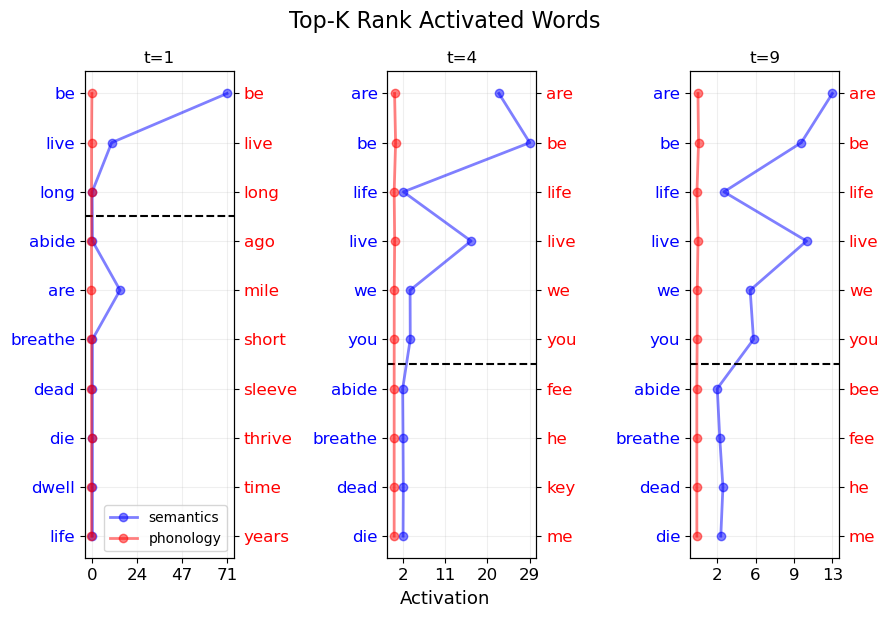

In [12]:
first_iter_sem = model.rank_status_activation(results[1]['status']['FreeAssociations'])
first_iter_phon = model.rank_status_activation(results[1]['status']['PhonSimilarities'])
first_iter_sem = dict(list(first_iter_sem.items())[:10])
first_iter_phon = dict(list(first_iter_phon.items())[:10])

middle_iter_sem = model.rank_status_activation(results[4]['status']['FreeAssociations'])
middle_iter_phon = model.rank_status_activation(results[4]['status']['PhonSimilarities'])
middle_iter_sem = dict(list(middle_iter_sem.items())[:10])
middle_iter_phon = dict(list(middle_iter_phon.items())[:10])

final_iter_sem = model.rank_status_activation(results[9]['status']['FreeAssociations'])
final_iter_phon = model.rank_status_activation(results[9]['status']['PhonSimilarities'])
final_iter_sem = dict(list(final_iter_sem.items())[:10])
final_iter_phon = dict(list(final_iter_phon.items())[:10])

sem_dicts = [first_iter_sem, middle_iter_sem, final_iter_sem]
phon_dicts =  [first_iter_phon, middle_iter_phon, final_iter_phon]

model.plot_top_k_rank(sem_dicts, phon_dicts, [1,4,9])

In [13]:
model = MultiplexSpreading(g_multiplex,
                      retention=0.7, decay=0, suppress=0,
                      intra_layer_prob = 0.5,
                      inter_layer_prob = 1,
                      weighted=False,
                     )

################### INITIAL SETTING ##############
initial_active_node = ['be']
initial_layer = ['FreeAssociations']

initial_status = {layer:
                  {node: 100 if node in initial_active_node and layer in initial_layer else 0 \
                   for node in g_multiplex.nodes} \
                 for layer in model.layers}

model.status = initial_status
time = 10
#################################################

results = model.iteration_bunch(time)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.62s/it]


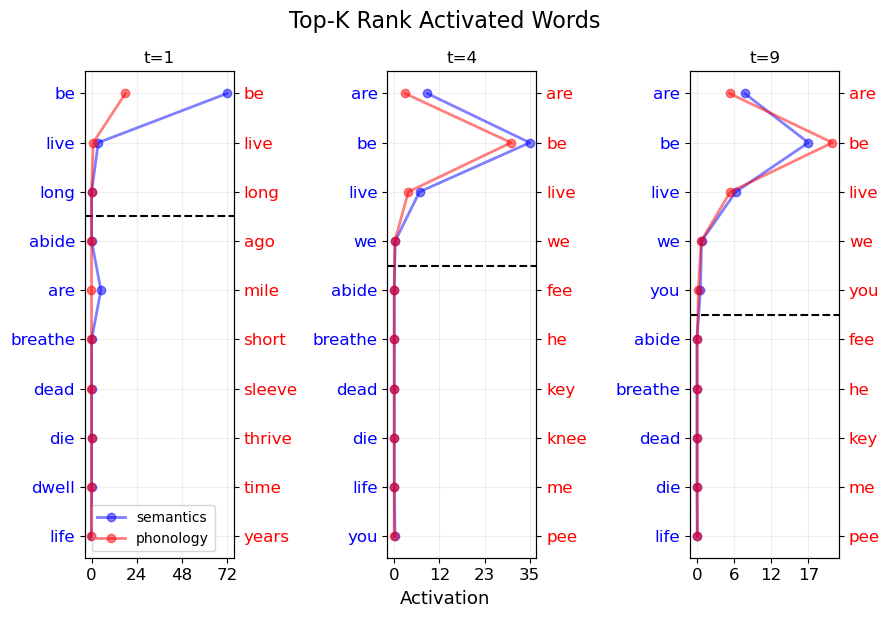

In [14]:
first_iter_sem = model.rank_status_activation(results[1]['status']['FreeAssociations'])
first_iter_phon = model.rank_status_activation(results[1]['status']['PhonSimilarities'])
first_iter_sem = dict(list(first_iter_sem.items())[:10])
first_iter_phon = dict(list(first_iter_phon.items())[:10])

middle_iter_sem = model.rank_status_activation(results[4]['status']['FreeAssociations'])
middle_iter_phon = model.rank_status_activation(results[4]['status']['PhonSimilarities'])
middle_iter_sem = dict(list(middle_iter_sem.items())[:10])
middle_iter_phon = dict(list(middle_iter_phon.items())[:10])

final_iter_sem = model.rank_status_activation(results[9]['status']['FreeAssociations'])
final_iter_phon = model.rank_status_activation(results[9]['status']['PhonSimilarities'])
final_iter_sem = dict(list(final_iter_sem.items())[:10])
final_iter_phon = dict(list(final_iter_phon.items())[:10])

sem_dicts = [first_iter_sem, middle_iter_sem, final_iter_sem]
phon_dicts =  [first_iter_phon, middle_iter_phon, final_iter_phon]

model.plot_top_k_rank(sem_dicts, phon_dicts, [1,4,9])